In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.naive_bayes import GaussianNB


In [4]:
nba = pd.read_csv("nba.csv")

In [5]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   Height    457 non-null    int64  
 6   College   373 non-null    object 
 7   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 28.7+ KB


In [6]:
nba.head()

,Name,Team,Number,Position,Age,Height,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,NaN,5000000.0


In [7]:
nba[["Salary"]].mean()

Salary    4.842684e+06
dtype: float64

array([[<AxesSubplot:title={'center':'Number'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

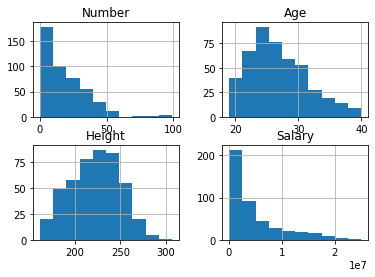

In [8]:
nba.hist()

<AxesSubplot:>

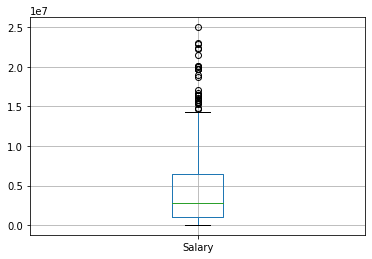

In [9]:
nba[["Salary"]].boxplot()

In [10]:
simp = SimpleImputer(strategy='median')

In [11]:
simp.fit(nba[["Salary"]])

SimpleImputer(strategy='median')

In [12]:
np.round(simp.transform(nba[["Salary"]]), 0)

array([[ 7730337.],
       [ 6796117.],
       [ 2839073.],
       [ 1148640.],
       [ 5000000.],
       [12000000.],
       [ 1170960.],
       [ 2165160.],
       [ 1824360.],
       [ 3431040.],
       [ 2569260.],
       [ 6912869.],
       [ 3425510.],
       [ 1749840.],
       [ 2616975.],
       [ 3425510.],
       [  845059.],
       [ 1500000.],
       [ 1335480.],
       [ 6300000.],
       [ 1599840.],
       [  134215.],
       [ 1500000.],
       [19689000.],
       [ 1140240.],
       [  947276.],
       [  981348.],
       [  947276.],
       [  947276.],
       [11235955.],
       [ 8000000.],
       [ 1635476.],
       [   30888.],
       [22875000.],
       [ 7402812.],
       [  845059.],
       [  845059.],
       [ 1572360.],
       [12650000.],
       [ 3750000.],
       [ 4131720.],
       [ 2814000.],
       [ 1636842.],
       [  947276.],
       [ 4000000.],
       [  167406.],
       [ 2839073.],
       [  947276.],
       [ 1000000.],
       [ 4626960.],


In [13]:
simp_kolej = SimpleImputer(strategy='most_frequent')
simp_kolej.fit(nba[["College"]])

SimpleImputer(strategy='most_frequent')

In [14]:
nba[["College"]] = simp_kolej.transform(nba[["College"]])

In [15]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   Height    457 non-null    int64  
 6   College   457 non-null    object 
 7   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 28.7+ KB


In [16]:
knnimp = KNNImputer(n_neighbors=3)
knnimp.fit(nba[["Salary"]])

KNNImputer(n_neighbors=3)

In [17]:
nba[["Salary"]] = knnimp.transform(nba[["Salary"]])

In [18]:
nba.head()

,Name,Team,Number,Position,Age,Height,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,Kentucky,5.000000e+06


In [19]:
standardscale = preprocessing.StandardScaler()

In [20]:
standardscale.fit(nba[["Age"]])

StandardScaler()

In [21]:
nba[["Age"]] = standardscale.transform(nba[["Age"]])

In [22]:
normalization = preprocessing.MinMaxScaler()
normalization.fit(nba[["Height"]])
nba[["Height"]] = normalization.transform(nba[["Height"]])

In [23]:
robscale = preprocessing.RobustScaler()
robscale.fit(nba[["Salary"]])
nba[["Salary"]] = robscale.transform(nba[["Salary"]])

In [24]:
nba.head()

,Name,Team,Number,Position,Age,Height,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,-0.440701,0.130137,Texas,0.929283
1,Jae Crowder,Boston Celtics,99,SF,-0.440701,0.506849,Marquette,0.750684
2,John Holland,Boston Celtics,30,SG,0.013927,0.301370,Boston University,0.377235
3,R.J. Hunter,Boston Celtics,28,SG,-1.122644,0.164384,Georgia State,-0.328974
4,Jonas Jerebko,Boston Celtics,8,PF,0.468556,0.479452,Kentucky,0.407310


<AxesSubplot:>

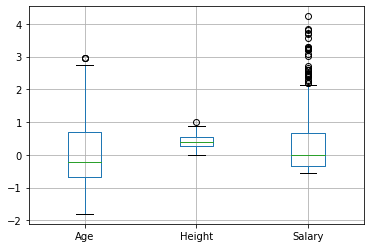

In [25]:
nba[["Age","Height", "Salary"]].boxplot()

In [26]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    float64
 6   College   457 non-null    object 
 7   Salary    457 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 28.7+ KB


In [27]:
nba[["Position"]] = nba[["Position"]].astype('category')

In [28]:
encode = preprocessing.OrdinalEncoder()

In [29]:
encode.fit(nba[["Position"]])

OrdinalEncoder()

In [30]:
nba[["Position"]].value_counts()

Position
SG          102
PF          100
PG           92
SF           85
C            78
dtype: int64

In [31]:
nba["Position_Encode"] = encode.transform(nba[["Position"]])

In [32]:
nba.head()

,Name,Team,Number,Position,Age,Height,College,Salary,Position_Encode
0,Avery Bradley,Boston Celtics,0,PG,-0.440701,0.130137,Texas,0.929283,2.0
1,Jae Crowder,Boston Celtics,99,SF,-0.440701,0.506849,Marquette,0.750684,3.0
2,John Holland,Boston Celtics,30,SG,0.013927,0.301370,Boston University,0.377235,4.0
3,R.J. Hunter,Boston Celtics,28,SG,-1.122644,0.164384,Georgia State,-0.328974,4.0
4,Jonas Jerebko,Boston Celtics,8,PF,0.468556,0.479452,Kentucky,0.407310,1.0


In [33]:
encode.fit(nba[["College"]])
nba["College"] = encode.transform(nba[["College"]])

In [34]:
categorization = preprocessing.KBinsDiscretizer(n_bins=4, strategy='uniform', encode='ordinal')

In [35]:
categorization.fit(nba[["Salary"]])

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [36]:
categorization.transform(nba[["Salary"]])

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [37]:
nba.head()

,Name,Team,Number,Position,Age,Height,College,Salary,Position_Encode
0,Avery Bradley,Boston Celtics,0,PG,-0.440701,0.130137,93.0,0.929283,2.0
1,Jae Crowder,Boston Celtics,99,SF,-0.440701,0.506849,52.0,0.750684,3.0
2,John Holland,Boston Celtics,30,SG,0.013927,0.301370,8.0,0.377235,4.0
3,R.J. Hunter,Boston Celtics,28,SG,-1.122644,0.164384,33.0,-0.328974,4.0
4,Jonas Jerebko,Boston Celtics,8,PF,0.468556,0.479452,45.0,0.407310,1.0


# Train Test Data Bölümleme

In [38]:
X = nba.loc[:, "Age": "Position_Encode"]

In [39]:
Xtrain, Xtest = train_test_split(X, test_size=0.25, random_state=1)

# Clustering Yöntemleri

In [40]:
clus_kmean = KMeans(n_clusters=3)

In [41]:
clus_kmean.fit(Xtrain)

KMeans(n_clusters=3)

In [42]:
clus_kmean.predict(Xtest)

array([0, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2,
       2, 2, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 2, 2, 2, 1])

In [43]:
clus_kmean.predict(Xtest)

array([0, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2,
       2, 2, 1, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 2, 2, 2, 1])

In [44]:
Xtest

,Age,Height,College,Salary,Position_Encode
67,0.695870,0.301370,102.0,1.745537,2.0
146,0.468556,0.472603,20.0,1.822600,3.0
323,0.013927,0.171233,106.0,0.980836,2.0
251,0.695870,0.712329,45.0,3.725992,0.0
224,0.013927,0.602740,26.0,-0.145321,0.0
...,...,...,...,...,...
394,1.605127,0.198630,82.0,0.282091,2.0
191,-0.213387,0.321918,7.0,2.111264,2.0
312,0.695870,0.575342,28.0,1.745537,0.0
340,0.923185,0.404110,26.0,1.392171,3.0


In [45]:
clus_agg = AgglomerativeClustering(n_clusters=3, )

In [46]:
clus_agg.fit(X)

AgglomerativeClustering(n_clusters=3)

In [47]:
clus_agg.labels_

array([1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0,
       2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0,
       0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1,
       0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1,
       2, 0, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0,
       1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1,
       1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0,

In [48]:
dbscan = DBSCAN(eps = 3, )

In [49]:
dbscan.fit(X)

DBSCAN(eps=3)

In [50]:
dbscan.labels_

array([ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

# Classification SInıflandırma Algoritmaları

In [51]:
nba.head()

,Name,Team,Number,Position,Age,Height,College,Salary,Position_Encode
0,Avery Bradley,Boston Celtics,0,PG,-0.440701,0.130137,93.0,0.929283,2.0
1,Jae Crowder,Boston Celtics,99,SF,-0.440701,0.506849,52.0,0.750684,3.0
2,John Holland,Boston Celtics,30,SG,0.013927,0.301370,8.0,0.377235,4.0
3,R.J. Hunter,Boston Celtics,28,SG,-1.122644,0.164384,33.0,-0.328974,4.0
4,Jonas Jerebko,Boston Celtics,8,PF,0.468556,0.479452,45.0,0.407310,1.0


In [52]:
X = nba[["Age","Height","Salary"]]
y = nba[["Position"]]

In [53]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state = 1, stratify=y)

In [54]:
Xtrain

,Age,Height,Salary
312,0.695870,0.575342,1.745537
118,0.468556,0.095890,0.789661
306,1.605127,0.164384,2.020352
325,-0.668016,0.301370,-0.367470
320,1.150499,0.404110,0.216135
...,...,...,...
105,-0.440701,0.232877,-0.326864
127,-0.668016,0.191781,2.032300
109,2.287070,0.349315,4.230816
198,0.695870,0.164384,1.420539


In [55]:
class_dectree = DecisionTreeClassifier()

In [56]:
class_dectree.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [57]:
ypred = class_dectree.predict(Xtest)
ypred

array(['SG', 'SF', 'PF', 'PG', 'PG', 'C', 'PG', 'SG', 'PF', 'PF', 'PF',
       'SG', 'SF', 'SG', 'PG', 'PG', 'SG', 'SG', 'PF', 'SG', 'C', 'PF',
       'SF', 'SF', 'PF', 'PF', 'SG', 'SG', 'C', 'PF', 'SG', 'PF', 'C',
       'PF', 'PF', 'SG', 'SF', 'C', 'C', 'PF', 'SG', 'C', 'PF', 'SG',
       'SF', 'SF', 'PG', 'PG', 'C', 'PG', 'PG', 'PF', 'PF', 'SG', 'PF',
       'PF', 'PF', 'SF', 'SG', 'C', 'SG', 'SG', 'C', 'SF', 'PF', 'C',
       'PF', 'SF', 'PG', 'SG', 'C', 'SG', 'PG', 'SG', 'PG', 'PF', 'C',
       'PG', 'PG', 'C', 'PF', 'SF', 'SG', 'PG', 'SG', 'C', 'SG', 'PF',
       'SF', 'PG', 'PG', 'PF'], dtype=object)

In [58]:
ytest

,Position
363,SG
357,SG
106,PF
380,SG
0,PG
...,...
373,C
342,SF
402,PG
80,PG


In [59]:
accuracy_score(ypred, ytest)
ytest.value_counts()

Position
SG          21
PF          20
PG          18
SF          17
C           16
dtype: int64

In [60]:
confusion_matrix(ytest,ypred)

array([[ 8,  7,  0,  1,  0],
       [ 6, 11,  0,  1,  2],
       [ 0,  0, 11,  0,  7],
       [ 1,  5,  3,  4,  4],
       [ 0,  2,  3,  6, 10]], dtype=int64)

In [61]:
precision_score(ytest, ypred, average=None)

array([0.53333333, 0.44      , 0.64705882, 0.33333333, 0.43478261])

In [62]:
recall_score(ytest, ypred, average=None)

array([0.5       , 0.55      , 0.61111111, 0.23529412, 0.47619048])

In [63]:
f1_score(ytest, ypred, average=None)

array([0.51612903, 0.48888889, 0.62857143, 0.27586207, 0.45454545])

In [64]:
conmat = confusion_matrix(ytest, ypred)

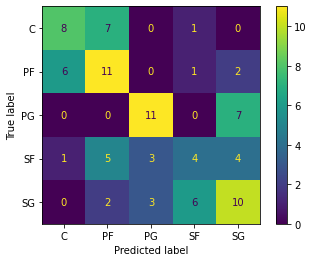

In [65]:

disp = metrics.ConfusionMatrixDisplay(conmat, display_labels = ["C","PF","PG","SF","SG"])
disp.plot()
plt.show()

In [66]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           C       0.53      0.50      0.52        16
          PF       0.44      0.55      0.49        20
          PG       0.65      0.61      0.63        18
          SF       0.33      0.24      0.28        17
          SG       0.43      0.48      0.45        21

    accuracy                           0.48        92
   macro avg       0.48      0.47      0.47        92
weighted avg       0.48      0.48      0.47        92



In [67]:
class_dectree.feature_importances_

array([0.22010525, 0.47025805, 0.3096367 ])

In [68]:
X = nba[["Age","Height","Salary"]]
y = nba[["Position"]]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state = 1, stratify=y)
class_dectree = DecisionTreeClassifier()
class_dectree.fit(Xtrain, ytrain)
ypred = class_dectree.predict(Xtest)
accuracy_score(ypred, ytest)
precision_score(ytest, ypred, average=None)
recall_score(ytest, ypred, average=None)
f1_score(ytest, ypred, average=None)
confusion_matrix(ytest,ypred)
class_dectree.feature_importances_

array([0.24764854, 0.45642344, 0.29592802])

In [69]:
X = nba[["Age","Height","Salary"]]
y = nba[["Position"]]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state = 1, stratify=y)

In [70]:
randfor = RandomForestClassifier()
randfor.fit(Xtrain, ytrain)

C:\Users\Betul\AppData\Local\Temp/ipykernel_7488/1730832093.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randfor.fit(Xtrain, ytrain)


RandomForestClassifier()

In [71]:
ypred = randfor.predict(Xtrain)

In [72]:
print(metrics.classification_report(ytrain, ypred))

              precision    recall  f1-score   support

           C       1.00      1.00      1.00        62
          PF       1.00      1.00      1.00        80
          PG       0.99      1.00      0.99        74
          SF       1.00      0.99      0.99        68
          SG       1.00      1.00      1.00        81

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [73]:
ytrain.value_counts()

Position
SG          81
PF          80
PG          74
SF          68
C           62
dtype: int64

In [74]:
confusion_matrix(ytrain, ypred)


array([[62,  0,  0,  0,  0],
       [ 0, 80,  0,  0,  0],
       [ 0,  0, 74,  0,  0],
       [ 0,  0,  1, 67,  0],
       [ 0,  0,  0,  0, 81]], dtype=int64)

In [75]:
logreg = LogisticRegression()

In [76]:
logreg.fit(Xtrain, ytrain)

C:\Users\Betul\PycharmProjects\EgitimNotlari\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [77]:
ypred = logreg.predict(Xtest)

In [78]:
class_dectree.feature_importances_

array([0.24764854, 0.45642344, 0.29592802])

In [79]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           C       0.75      0.56      0.64        16
          PF       0.47      0.70      0.56        20
          PG       0.74      0.78      0.76        18
          SF       0.50      0.06      0.11        17
          SG       0.45      0.62      0.52        21

    accuracy                           0.55        92
   macro avg       0.58      0.54      0.52        92
weighted avg       0.57      0.55      0.52        92



In [80]:
naivbayes = GaussianNB()

In [81]:
naivbayes.fit(Xtrain, ytrain)

C:\Users\Betul\PycharmProjects\EgitimNotlari\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [82]:
ypred = naivbayes.predict(Xtest)

In [83]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           C       0.60      0.56      0.58        16
          PF       0.52      0.60      0.56        20
          PG       0.77      0.94      0.85        18
          SF       0.33      0.18      0.23        17
          SG       0.52      0.57      0.55        21

    accuracy                           0.58        92
   macro avg       0.55      0.57      0.55        92
weighted avg       0.55      0.58      0.56        92



In [84]:
naivbayes.predict(Xtest)
Xtest

,Age,Height,Salary
363,-0.668016,0.335616,0.444115
357,-1.349958,0.390411,0.166712
106,0.923185,0.609589,0.024960
380,0.695870,0.232877,-0.338158
0,-0.440701,0.130137,0.929283
...,...,...,...
373,1.150499,0.541096,1.595922
342,0.695870,0.301370,-0.367470
402,-1.349958,0.191781,-0.137853
80,0.241242,0.198630,1.625247


In [105]:
data = np.array([20, 180, 56666])
#naivbayes.predict(data)
data = data.reshape(1,3) 

In [106]:
data

array([[   20,   180, 56666]])

In [108]:
naivbayes.predict_proba(data)

C:\Users\Betul\PycharmProjects\EgitimNotlari\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 1., 0.]])

In [87]:
ann = MLPClassifier(hidden_layer_sizes=(100,100,100))

In [88]:
ann.fit(Xtrain, ytrain)

C:\Users\Betul\PycharmProjects\EgitimNotlari\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Betul\PycharmProjects\EgitimNotlari\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100))

In [89]:
ypred = ann.predict(Xtest)

In [90]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           C       0.65      0.81      0.72        16
          PF       0.58      0.55      0.56        20
          PG       0.68      0.83      0.75        18
          SF       0.25      0.12      0.16        17
          SG       0.52      0.57      0.55        21

    accuracy                           0.58        92
   macro avg       0.54      0.58      0.55        92
weighted avg       0.54      0.58      0.55        92



In [91]:
svmac = SVC(kernel = 'linear')

In [92]:
svmac.fit(Xtrain, ytrain)

C:\Users\Betul\PycharmProjects\EgitimNotlari\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [93]:
ypred = svmac.predict(Xtest)

In [94]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           C       0.78      0.44      0.56        16
          PF       0.47      0.75      0.58        20
          PG       0.90      0.50      0.64        18
          SF       0.50      0.06      0.11        17
          SG       0.44      0.81      0.57        21

    accuracy                           0.53        92
   macro avg       0.62      0.51      0.49        92
weighted avg       0.61      0.53      0.50        92



In [95]:
svmac.coef_[0]

array([-0.13312347,  3.80955296,  0.2966324 ])

# Prediction Algoritmaları

In [119]:
reg = LinearRegression()

In [114]:
y = nba[["Salary"]]
X = nba[["Position_Encode","Age", "Height", "College"]]
y

,Salary
0,0.929283
1,0.750684
2,0.377235
3,-0.328974
4,0.407310
...,...
452,-0.120372
453,-0.083373
454,-0.376508
455,0.005842


In [115]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state= 1)

,Salary
270,0.377235
267,-0.318880
327,-0.367470
438,-0.448181
453,-0.083373
...,...
255,-0.367470
72,0.005842
396,-0.499149
235,-0.448181


In [120]:
reg.fit(Xtrain, ytrain)

LinearRegression()

In [121]:
ypred = reg.predict(Xtest)

In [124]:
mae = metrics.mean_absolute_error(ytest, ypred)
mae

0.7911334666305503

In [125]:
mape = metrics.mean_absolute_percentage_error(ytest, ypred, )
mape

1391829212564.607

In [126]:
mse = metrics.mean_squared_error(ytest, ypred)
mse

1.0222590738727972

In [127]:

rmse = np.sqrt(mse)
rmse

1.0110682834867273

In [129]:
decicisiontree = DecisionTreeRegressor()

In [130]:
decicisiontree.fit(Xtrain, ytrain)
ypred = decicisiontree.predict(Xtest)

In [131]:
mae = metrics.mean_absolute_error(ytest, ypred)
mae

1.1190151839301115

In [132]:
mape = metrics.mean_absolute_percentage_error(ytest, ypred, )
mape

16559205919464.195

In [133]:
mse = metrics.mean_squared_error(ytest, ypred)
mse

2.376397895003773

In [134]:
rmse = np.sqrt(mse)
rmse

1.5415569710535428

In [140]:
support = SVR()

In [141]:
support.fit(Xtrain, ytrain)
ypred = support.predict(Xtest)

C:\Users\Betul\PycharmProjects\EgitimNotlari\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [142]:
mae = metrics.mean_absolute_error(ytest, ypred)
mae

0.7485973052569779

In [143]:
mape = metrics.mean_absolute_percentage_error(ytest, ypred, )
mape

7014267874538.635

In [144]:
mse = metrics.mean_squared_error(ytest, ypred)
mse

1.209472253982746

In [161]:
ann = MLPRegressor(hidden_layer_sizes=(100,100,100))

In [157]:
ann.fit(Xtrain, ytrain)
ypred = ann.predict(Xtest)

C:\Users\Betul\PycharmProjects\EgitimNotlari\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [158]:
mae = metrics.mean_absolute_error(ytest, ypred)
mae

0.8433808317856802

In [159]:
mape = metrics.mean_absolute_percentage_error(ytest, ypred, )
mape

8896576972608.463

In [160]:
mse = metrics.mean_squared_error(ytest, ypred)
mse

1.0695719237999886